In [76]:
import pandas as pd
import numpy as np

read the file into datframe. Once file has been read calculate the median of column mpg which comes out to be 22.75. In following step we use numpy to check condition and create new column mpg01

In [77]:
df=pd.read_csv('Auto.csv')

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 24.6 KB


In [79]:
median = np.median(df.loc[:, 'mpg'])
median

22.75

In [80]:
df['mpg01'] = np.where(df['mpg'] >= 22.75, 1, 0)


In [81]:
df['year'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

# Exploratory Data Analysis
Lets import matplotlib and seaborn to perform some EDA.

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

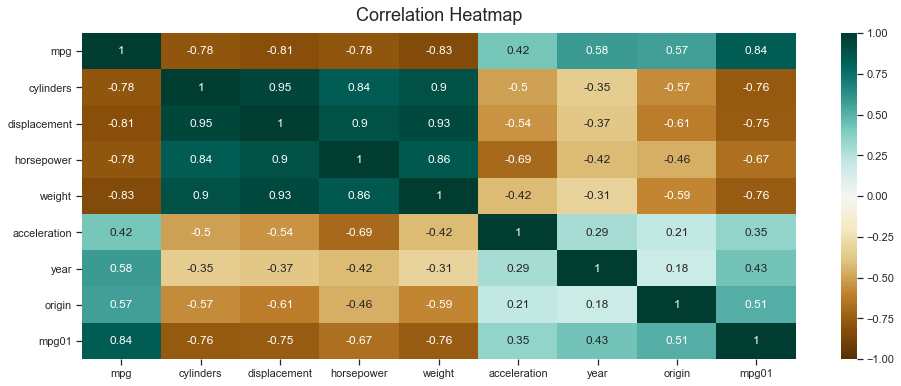

In [83]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

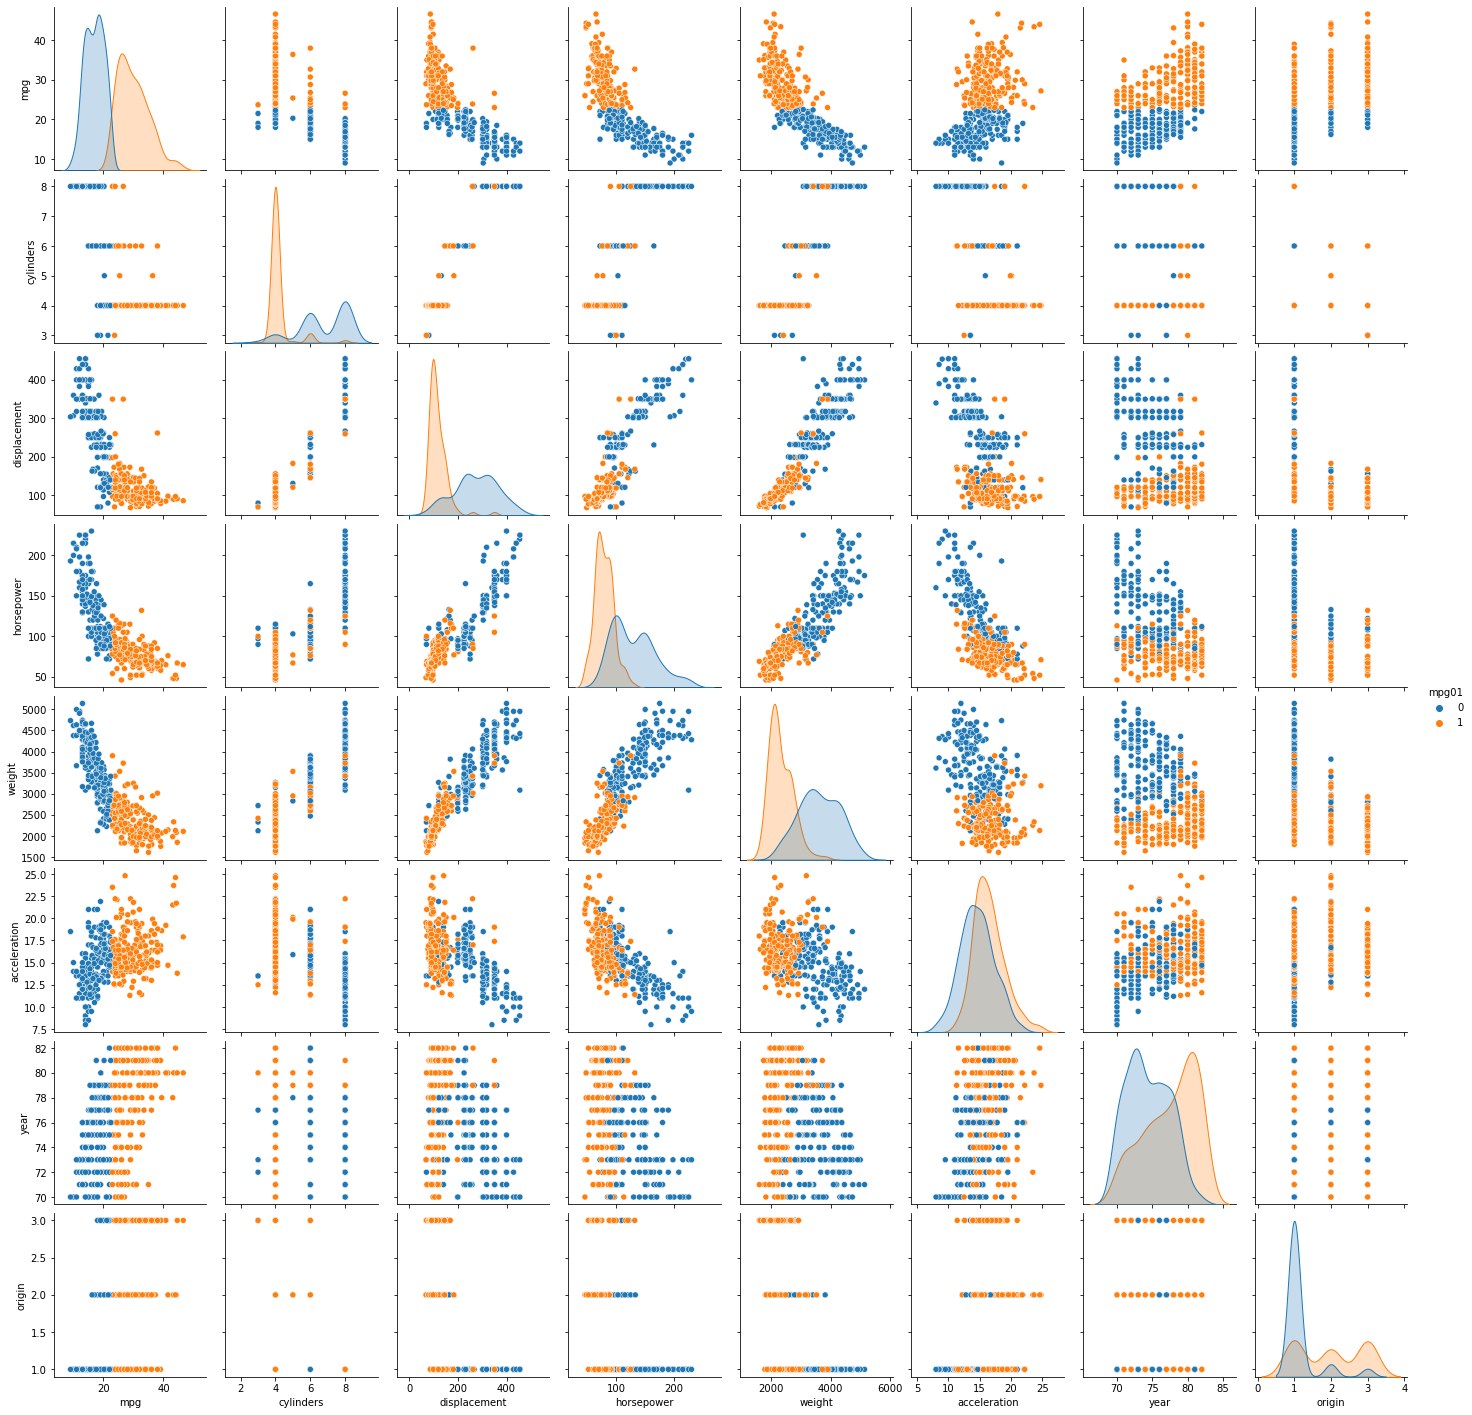

In [11]:
sns.pairplot(df, hue ='mpg01')
plt.show()

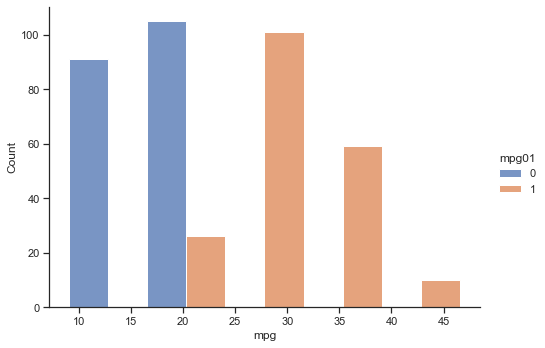

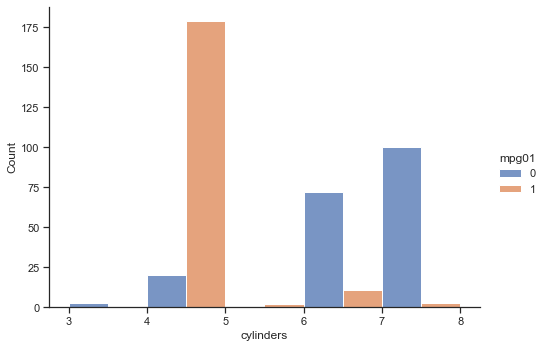

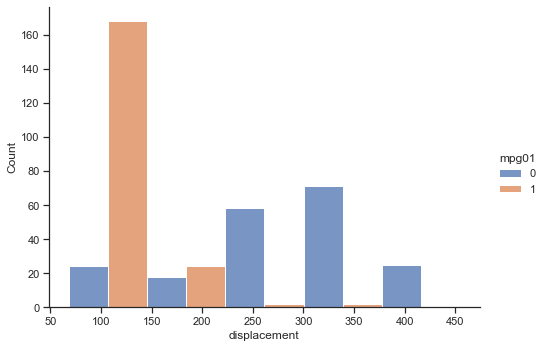

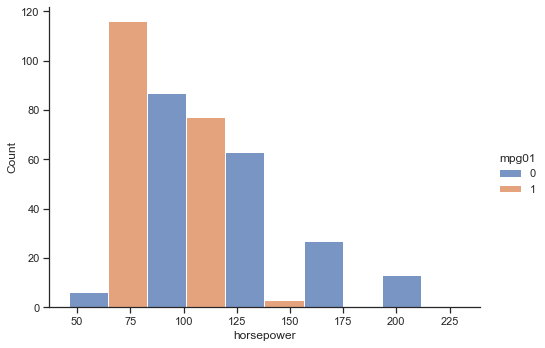

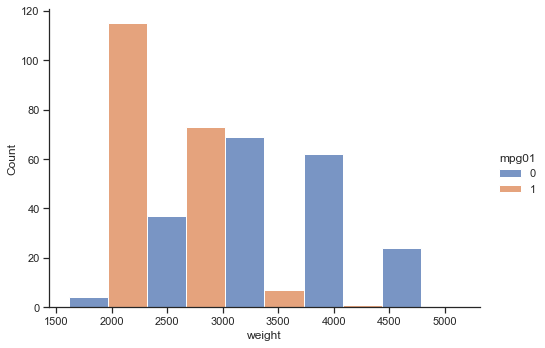

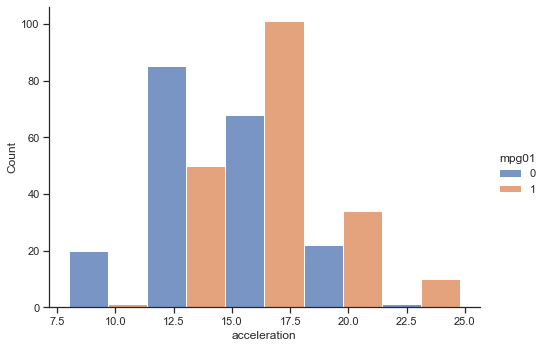

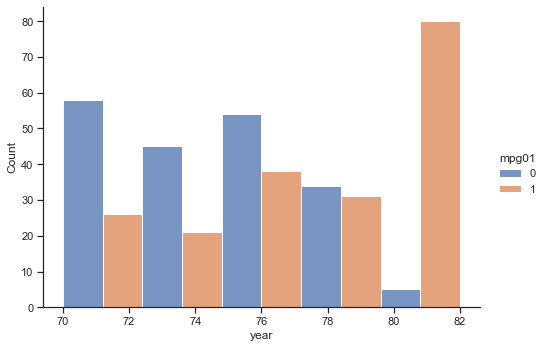

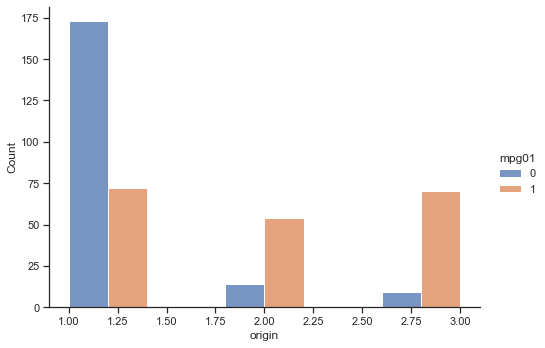

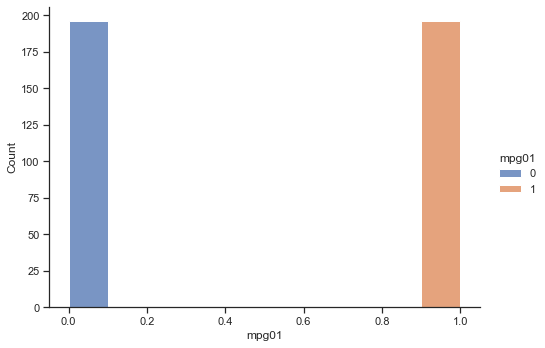

In [84]:
import matplotlib.pyplot as plt
for i,column in enumerate(df.columns,1):
    sns.displot(data=df,x=df[column],kind='hist',height=5, aspect=1.4,bins=5,hue='mpg01',multiple='dodge')

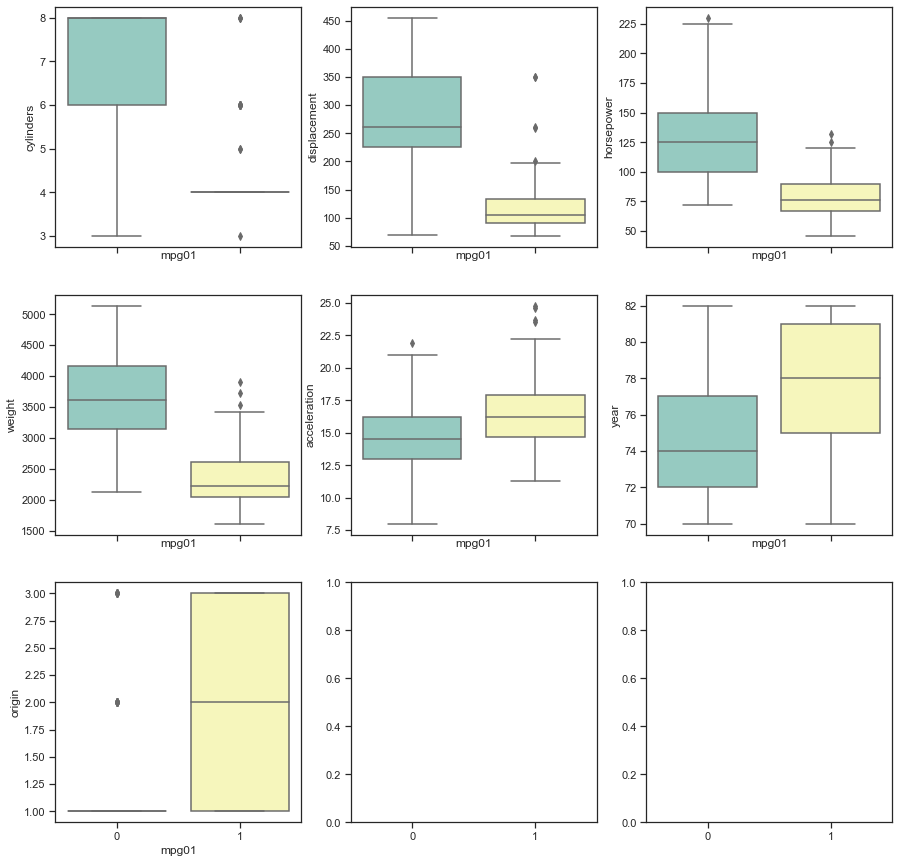

In [85]:
f, axes = plt.subplots(3, 3, figsize=(15, 15), sharex=True)
cols = df.columns
row = 0
count = 0
for i in range(7):
    sns.boxplot(x = "mpg01", y = df.columns[i + 1], data=df,palette="Set3", ax = axes[row, (i + 3) % 3])
    count += 1
    if (count == 3):
        count = 0
        row += 1

In [37]:
import pandas_profiling as pp
report = pp.ProfileReport(df)
report.to_file("output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [38]:
report

In [42]:
from sklearn.model_selection import train_test_split
X = df.drop(['mpg01'], axis = 1)
y = df["mpg01"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state = 42)

In [44]:
X_train = X_train.loc[:,['displacement', 'horsepower', 'weight','acceleration']]
X_test = X_test.loc[:,['displacement', 'horsepower', 'weight','acceleration']]

LDA on entire features

In [43]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)
y_pred_lda = clf.fit(X_train, y_train).predict(X_test)
trainError = clf.fit(X_train, y_train).predict(X_train)
print("LDA Training Error:", np.mean(trainError != y_train))
print("LDA Testing Error:", np.mean(y_pred_lda != y_test))

LDA Training Error: 0.051094890510948905
LDA Testing Error: 0.11016949152542373


## LDA

In [45]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)
y_pred_lda = clf.fit(X_train, y_train).predict(X_test)
trainError = clf.fit(X_train, y_train).predict(X_train)
print("LDA Training Error:", np.mean(trainError != y_train))
print("LDA Testing Error:", np.mean(y_pred_lda != y_test))

LDA Training Error: 0.08394160583941605
LDA Testing Error: 0.16101694915254236


## QDA

In [46]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
y_pred_qda = qda.fit(X_train, y_train).predict(X_test)
QtrainError = qda.fit(X_train, y_train).predict(X_train)
print("QDA Training Error:", np.mean(QtrainError != y_train))
print("QDA Testing Error:", np.mean(y_pred_qda != y_test))

QDA Training Error: 0.08394160583941605
QDA Testing Error: 0.1694915254237288


## GNB

In [47]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred_NB = gnb.fit(X_train, y_train).predict(X_test)
NBtrainError = gnb.fit(X_train, y_train).predict(X_train)
print("Naive Bayses Training Error:", np.mean(NBtrainError != y_train))
print("Naive Bayses Testing Error:", np.mean(y_pred_NB != y_test))

Naive Bayses Training Error: 0.09854014598540146
Naive Bayses Testing Error: 0.1694915254237288


## Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(random_state=0).fit(X_train, y_train)
lgr_y_pred = lgr.predict(X_test)
LgrError = lgr.fit(X_train, y_train).predict(X_train)
print("Logistic Training Error:", np.mean(LgrError != y_train))
print("Logistic Testing Error:", np.mean(lgr_y_pred != y_test))

Logistic Training Error: 0.10583941605839416
Logistic Testing Error: 0.1440677966101695


In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
scaled_features = scaler.transform(X_train)
df_scaled = pd.DataFrame(scaled_features, columns = X_train.columns)
scaler_test = StandardScaler()
scaler_test.fit(X_test)
scaled_features_test = scaler.transform(X_test)
df_scaled_test = pd.DataFrame(scaled_features_test, columns = X_test.columns)


In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_1.fit(df_feat,y_train)
pred_knn = knn_1.predict(df_feat_test)

In [70]:
from sklearn.metrics import classification_report,confusion_matrix
cm=confusion_matrix(y_test,pred_knn)
print(confusion_matrix(y_test,pred_knn))


[[51 14]
 [ 0 53]]


<AxesSubplot:>

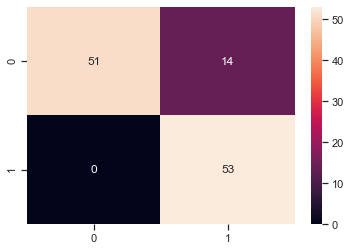

In [71]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [67]:
error_rate = []
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(df_feat,y_train)
    pred_i = knn.predict(df_feat_test)
    print (i, (np.mean(pred_i != y_test)))

1 0.11864406779661017
2 0.09322033898305085
3 0.11864406779661017
4 0.11864406779661017
5 0.1271186440677966
6 0.13559322033898305
7 0.1440677966101695
8 0.1440677966101695
9 0.1440677966101695
10 0.13559322033898305


In [62]:
len(error_rate)

9

In [64]:
results=pd.DataFrame({'Error': [error_rate]})

In [65]:
results

Error
0  [0.11864406779661017, 0.09322033898305085, 0.1...